In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def ignore_warn(*args, **kwargs):
    pass

# ignore annoying warning (from sklearn and seaborn)
warnings.warn = ignore_warn
# Increasing width to 100% on my PC
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime as dt
from datetime import datetime

## Cleaning The Subset

In [2]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Riskworx\\Paper\\Notebooks\\cleaned_df.csv', low_memory=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  int64  
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  int64  
 5   loan_status           1345310 non-null  object 
 6   purpose               1345310 non-null  int64  
 7   dti                   1345310 non-null  float64
 8   open_acc              1345310 non-null  float64
 9   pub_rec               1345310 non-null  float64
 10  revol_bal             1345310 non-null  float64
 11  revol_util            1345310 non-null  float64
 12  mort_acc              1345310 non-null  float64
 13  pub_rec_bankruptcies  1345310 non-null  float64
 14  log_income            1345310 non-

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
0,3600.000,0,13.990,123.030,2,Fully Paid,2,5.910,7.000,0.000,2765.000,0.297,1.000,0.000,4.740,Dec-2015
1,24700.000,0,11.990,820.280,2,Fully Paid,11,16.060,22.000,0.000,21470.000,0.192,4.000,0.000,4.813,Dec-2015
2,20000.000,1,10.780,432.660,1,Fully Paid,4,10.780,6.000,0.000,7869.000,0.562,5.000,0.000,4.799,Dec-2015
3,10400.000,1,22.450,289.910,5,Fully Paid,6,25.370,12.000,0.000,21929.000,0.645,6.000,0.000,5.019,Dec-2015
4,11950.000,0,13.440,405.180,2,Fully Paid,2,10.200,5.000,0.000,8822.000,0.684,0.000,0.000,4.531,Dec-2015


In [5]:
#make datettime object
df['issue_d'] = pd.to_datetime(df['issue_d'])

df.sort_values(by='issue_d',
                   axis=0,
                   ascending=True,
                   inplace=True,
                   na_position='first')

#check data
df.head()

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
957957,7500.000,0,13.750,255.430,4,Fully Paid,2,14.290,7.000,0.000,4175.000,0.515,1.000,0.000,4.342,2007-06-01
957922,3500.000,0,10.280,113.390,2,Fully Paid,8,1.500,17.000,0.000,1882.000,0.324,1.000,0.000,4.301,2007-07-01
957923,5750.000,0,7.430,178.690,0,Fully Paid,2,0.270,10.000,0.000,2817.000,0.102,1.000,0.000,5.097,2007-07-01
957924,5000.000,0,7.430,155.380,0,Fully Paid,0,2.550,4.000,0.000,2562.000,0.140,1.000,0.000,4.602,2007-07-01
957930,1200.000,0,11.540,39.600,2,Fully Paid,1,2.040,3.000,0.000,1153.000,0.758,1.000,0.000,4.301,2007-07-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 957957 to 895725
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   loan_amnt             1345310 non-null  float64       
 1   term                  1345310 non-null  int64         
 2   int_rate              1345310 non-null  float64       
 3   installment           1345310 non-null  float64       
 4   grade                 1345310 non-null  int64         
 5   loan_status           1345310 non-null  object        
 6   purpose               1345310 non-null  int64         
 7   dti                   1345310 non-null  float64       
 8   open_acc              1345310 non-null  float64       
 9   pub_rec               1345310 non-null  float64       
 10  revol_bal             1345310 non-null  float64       
 11  revol_util            1345310 non-null  float64       
 12  mort_acc              1345310 non-null

In [7]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000
mean,14419.972,0.241,13.240,438.076,1.746,2.693,18.282,11.594,0.215,16248.115,0.518,1.591,0.134,4.813
std,8717.051,0.428,4.769,261.513,1.295,2.382,11.159,5.474,0.602,22328.169,0.245,1.779,0.378,0.248
min,500.000,0.000,5.310,4.930,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8000.000,0.000,9.750,248.480,1.000,2.000,11.790,8.000,0.000,5943.000,0.335,0.000,0.000,4.661
50%,12000.000,0.000,12.740,375.430,2.000,2.000,17.610,11.000,0.000,11134.000,0.522,1.000,0.000,4.813
75%,20000.000,0.000,15.990,580.730,2.000,2.000,24.050,14.000,0.000,19755.750,0.707,3.000,0.000,4.954
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,90.000,86.000,2904836.000,8.923,6.000,12.000,7.041


We will take a note here to address the case of future leak. Let us see how many loans we issued each year. For the sake of this exerise let us assume we have all data points until the last 10%.

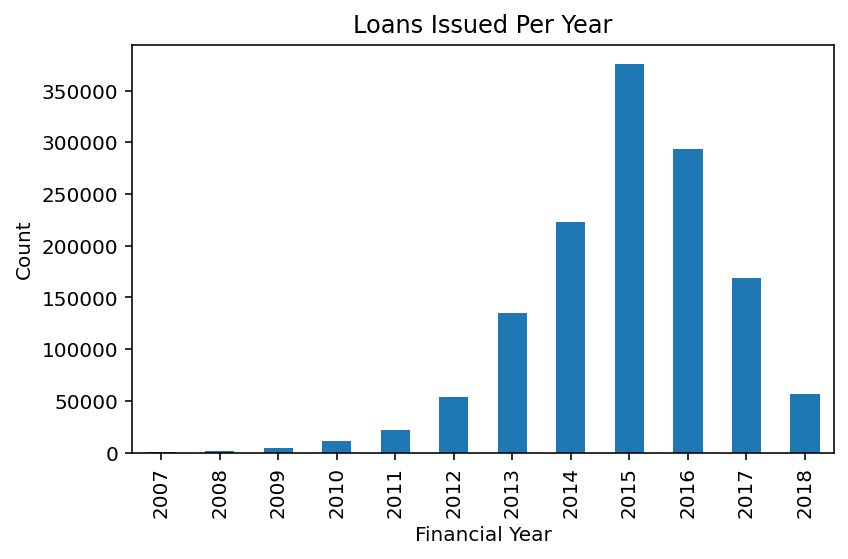

In [8]:
df['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [9]:
df['issue_d'].isnull().any()

False

In [10]:
df['issue_d'].describe()

count                 1345310
unique                    139
top       2016-03-01 00:00:00
freq                    48937
first     2007-06-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

There are 139 unique values. The first loans were issued in June 2007 and the last loans were issued in Dec 2018. The busiest month was March 2016, with 48937 loans funded in that month.

In [11]:
df[df['issue_d'] > dt.datetime(2014,1,1)].describe() #included 2014

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000
mean,14539.781,0.241,13.092,440.923,1.750,2.667,18.681,11.777,0.239,16345.614,0.507,1.591,0.146,4.817
std,8843.063,0.428,4.835,265.554,1.293,2.326,11.767,5.622,0.634,23047.069,0.245,1.783,0.395,0.252
min,1000.000,0.000,5.310,14.010,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8000.000,0.000,9.440,248.300,1.000,2.000,12.040,8.000,0.000,5814.000,0.323,0.000,0.000,4.663
50%,12000.000,0.000,12.620,374.650,2.000,2.000,17.950,11.000,0.000,10964.000,0.507,1.000,0.000,4.813
75%,20000.000,0.000,15.610,587.170,2.000,2.000,24.580,15.000,0.000,19661.000,0.693,3.000,0.000,4.964
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,90.000,86.000,2904836.000,8.923,6.000,12.000,7.041


In [12]:
df[df['issue_d'] > dt.datetime(2015,1,1)].describe() #included 2015

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000
mean,14527.344,0.233,12.974,441.464,1.722,2.720,18.843,11.811,0.243,16329.719,0.495,1.549,0.149,4.819
std,8958.588,0.422,4.959,270.398,1.284,2.376,12.588,5.706,0.642,23413.691,0.246,1.747,0.398,0.258
min,1000.000,0.000,5.310,14.770,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7600.000,0.000,9.170,244.680,1.000,2.000,12.060,8.000,0.000,5711.000,0.308,0.000,0.000,4.672
50%,12000.000,0.000,12.290,372.450,2.000,2.000,18.040,11.000,0.000,10832.000,0.491,1.000,0.000,4.813
75%,20000.000,0.000,15.610,589.980,2.000,2.000,24.780,15.000,0.000,19487.000,0.681,3.000,0.000,4.968
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,86.000,2904836.000,1.930,6.000,9.000,7.041


In [13]:
df[df['issue_d'] > dt.datetime(2016,1,1)].describe() #included 2016

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000
mean,14406.962,0.226,13.477,442.797,1.741,2.876,18.766,11.735,0.245,15628.101,0.469,1.503,0.156,4.821
std,9246.352,0.418,5.334,282.691,1.272,2.503,14.775,5.763,0.627,22695.053,0.249,1.702,0.402,0.275
min,1000.000,0.000,5.310,30.120,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7200.000,0.000,9.750,235.080,1.000,2.000,11.800,8.000,0.000,5332.000,0.277,0.000,0.000,4.674
50%,12000.000,0.000,12.740,366.510,2.000,2.000,17.790,11.000,0.000,10284.000,0.461,1.000,0.000,4.816
75%,20000.000,0.000,16.020,594.710,2.000,2.000,24.540,15.000,0.000,18576.000,0.656,3.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,61.000,1696796.000,1.658,6.000,9.000,7.041


In [14]:
df[df['issue_d'] > dt.datetime(2017,1,1)].describe() #included 2017

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000
mean,14441.612,0.250,13.775,439.758,1.730,2.997,18.776,11.574,0.215,15022.504,0.439,1.471,0.155,4.817
std,9658.755,0.433,5.609,289.920,1.279,2.600,18.652,5.788,0.546,22021.353,0.253,1.677,0.384,0.313
min,1000.000,0.000,5.310,30.120,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7000.000,0.000,9.930,225.650,1.000,2.000,11.320,8.000,0.000,4870.000,0.238,0.000,0.000,4.672
50%,12000.000,0.000,12.740,359.660,2.000,2.000,17.420,11.000,0.000,9830.000,0.423,1.000,0.000,4.820
75%,20000.000,1.000,16.020,594.620,2.000,2.000,24.260,14.000,0.000,18034.000,0.626,2.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,28.000,1696796.000,1.549,6.000,6.000,7.041


In [15]:
df[df['issue_d'] > dt.datetime(2017,12,1)].describe() #Checking 2018 data

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000,56311.000
mean,14881.363,0.267,13.429,444.407,1.599,3.121,18.470,11.401,0.158,14374.930,0.393,1.495,0.142,4.812
std,10133.716,0.442,5.524,292.969,1.246,2.700,19.017,5.910,0.405,21489.869,0.256,1.696,0.354,0.357
min,1000.000,0.000,5.310,30.120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7000.000,0.000,9.440,222.740,1.000,2.000,10.340,7.000,0.000,4096.000,0.183,0.000,0.000,4.671
50%,12000.000,0.000,12.610,361.380,2.000,2.000,16.700,10.000,0.000,9084.000,0.364,1.000,0.000,4.826
75%,20000.000,1.000,16.910,611.540,2.000,4.000,23.880,14.000,0.000,17412.000,0.578,2.000,0.000,4.978
max,40000.000,1.000,30.990,1628.080,6.000,13.000,999.000,65.000,8.000,925589.000,1.322,6.000,3.000,6.968


We need to decide what sample of data from which starting date of loan issuing we want to use (onwards to 2018-12-01). 
- 2014 includes 1 million data entries
- 2015 includes 800k data entries
- 2016 includes 490k data entries
- 2017 includes 200k data entries
- 2018 includes 56k data entries

Let's use only the data from the past two years, that is, the data from 2017 to 2018.

In [16]:
df_sample = df[df['issue_d'] > dt.datetime(2016,12,1)]

In [17]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225611 entries, 1001482 to 895725
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             225611 non-null  float64       
 1   term                  225611 non-null  int64         
 2   int_rate              225611 non-null  float64       
 3   installment           225611 non-null  float64       
 4   grade                 225611 non-null  int64         
 5   loan_status           225611 non-null  object        
 6   purpose               225611 non-null  int64         
 7   dti                   225611 non-null  float64       
 8   open_acc              225611 non-null  float64       
 9   pub_rec               225611 non-null  float64       
 10  revol_bal             225611 non-null  float64       
 11  revol_util            225611 non-null  float64       
 12  mort_acc              225611 non-null  float64      

In [18]:
df_sample.describe()

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000
mean,14445.966,0.247,13.796,440.832,1.739,2.979,18.756,11.594,0.220,15124.262,0.442,1.476,0.155,4.818
std,9635.102,0.431,5.595,290.165,1.277,2.587,18.395,5.789,0.557,22080.496,0.252,1.680,0.387,0.309
min,1000.000,0.000,5.310,30.120,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7000.000,0.000,9.930,226.420,1.000,2.000,11.380,8.000,0.000,4952.000,0.242,0.000,0.000,4.677
50%,12000.000,0.000,12.740,361.290,2.000,2.000,17.450,11.000,0.000,9923.000,0.428,1.000,0.000,4.820
75%,20000.000,0.000,16.020,595.410,2.000,2.000,24.250,14.000,0.000,18143.000,0.630,2.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,28.000,1696796.000,1.549,6.000,6.000,7.041


In [19]:
df_sample.head(10)

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
1001482,3500.000,0,12.740,117.500,2,Fully Paid,2,30.150,24.000,1.000,19761.000,0.618,2.000,1.000,4.892,2017-01-01
1001483,11000.000,0,15.990,386.680,2,Fully Paid,1,15.970,10.000,0.000,28867.000,0.546,0.000,0.000,5.061,2017-01-01
990197,3500.000,0,18.990,128.280,3,Fully Paid,9,24.340,20.000,0.000,40056.000,0.975,4.000,0.000,5.140,2017-01-01
997072,10000.000,0,16.990,356.480,3,Charged Off,1,32.120,16.000,1.000,25634.000,0.635,2.000,1.000,4.591,2017-01-01
997073,4000.000,0,12.740,134.280,2,Fully Paid,8,19.870,9.000,0.000,6312.000,0.743,0.000,0.000,4.799,2017-01-01
997074,6000.000,0,13.990,205.040,2,Charged Off,11,9.720,11.000,0.000,3991.000,0.650,1.000,0.000,4.699,2017-01-01
997075,6000.000,0,5.320,180.690,0,Fully Paid,4,6.510,10.000,0.000,7471.000,0.233,5.000,0.000,5.021,2017-01-01
997076,30000.000,0,11.440,988.430,1,Charged Off,2,14.250,10.000,1.000,14781.000,0.558,0.000,1.000,5.114,2017-01-01
997077,25000.000,0,11.490,824.290,1,Fully Paid,2,10.910,7.000,0.000,13547.000,0.553,6.000,0.000,4.826,2017-01-01
997078,22400.000,0,8.240,704.420,1,Fully Paid,1,16.220,10.000,0.000,16056.000,0.740,2.000,0.000,5.000,2017-01-01


In [20]:
loan_status_dict = {'Fully Paid':0, 'Charged Off':1}
df_sample['loan_status'].replace(loan_status_dict, inplace = True)
df_sample['loan_status'].value_counts()

0    177596
1     48015
Name: loan_status, dtype: int64

In [21]:
df_sample['loan_status'].value_counts().sum()

225611

In [22]:
df_sample.head(10)

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
1001482,3500.000,0,12.740,117.500,2,0,2,30.150,24.000,1.000,19761.000,0.618,2.000,1.000,4.892,2017-01-01
1001483,11000.000,0,15.990,386.680,2,0,1,15.970,10.000,0.000,28867.000,0.546,0.000,0.000,5.061,2017-01-01
990197,3500.000,0,18.990,128.280,3,0,9,24.340,20.000,0.000,40056.000,0.975,4.000,0.000,5.140,2017-01-01
997072,10000.000,0,16.990,356.480,3,1,1,32.120,16.000,1.000,25634.000,0.635,2.000,1.000,4.591,2017-01-01
997073,4000.000,0,12.740,134.280,2,0,8,19.870,9.000,0.000,6312.000,0.743,0.000,0.000,4.799,2017-01-01
997074,6000.000,0,13.990,205.040,2,1,11,9.720,11.000,0.000,3991.000,0.650,1.000,0.000,4.699,2017-01-01
997075,6000.000,0,5.320,180.690,0,0,4,6.510,10.000,0.000,7471.000,0.233,5.000,0.000,5.021,2017-01-01
997076,30000.000,0,11.440,988.430,1,1,2,14.250,10.000,1.000,14781.000,0.558,0.000,1.000,5.114,2017-01-01
997077,25000.000,0,11.490,824.290,1,0,2,10.910,7.000,0.000,13547.000,0.553,6.000,0.000,4.826,2017-01-01
997078,22400.000,0,8.240,704.420,1,0,1,16.220,10.000,0.000,16056.000,0.740,2.000,0.000,5.000,2017-01-01


In [23]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225611 entries, 1001482 to 895725
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             225611 non-null  float64       
 1   term                  225611 non-null  int64         
 2   int_rate              225611 non-null  float64       
 3   installment           225611 non-null  float64       
 4   grade                 225611 non-null  int64         
 5   loan_status           225611 non-null  int64         
 6   purpose               225611 non-null  int64         
 7   dti                   225611 non-null  float64       
 8   open_acc              225611 non-null  float64       
 9   pub_rec               225611 non-null  float64       
 10  revol_bal             225611 non-null  float64       
 11  revol_util            225611 non-null  float64       
 12  mort_acc              225611 non-null  float64      

In [24]:
df_sample.to_csv('df_sample_2017_2018.csv', index=False)

## Analysis

In [25]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Riskworx\\Paper\\Notebooks\\df_sample_2017_2018.csv', low_memory=True)
df.head(10)

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
0,3500.000,0,12.740,117.500,2,0,2,30.150,24.000,1.000,19761.000,0.618,2.000,1.000,4.892,2017-01-01
1,11000.000,0,15.990,386.680,2,0,1,15.970,10.000,0.000,28867.000,0.546,0.000,0.000,5.061,2017-01-01
2,3500.000,0,18.990,128.280,3,0,9,24.340,20.000,0.000,40056.000,0.975,4.000,0.000,5.140,2017-01-01
3,10000.000,0,16.990,356.480,3,1,1,32.120,16.000,1.000,25634.000,0.635,2.000,1.000,4.591,2017-01-01
4,4000.000,0,12.740,134.280,2,0,8,19.870,9.000,0.000,6312.000,0.743,0.000,0.000,4.799,2017-01-01
5,6000.000,0,13.990,205.040,2,1,11,9.720,11.000,0.000,3991.000,0.650,1.000,0.000,4.699,2017-01-01
6,6000.000,0,5.320,180.690,0,0,4,6.510,10.000,0.000,7471.000,0.233,5.000,0.000,5.021,2017-01-01
7,30000.000,0,11.440,988.430,1,1,2,14.250,10.000,1.000,14781.000,0.558,0.000,1.000,5.114,2017-01-01
8,25000.000,0,11.490,824.290,1,0,2,10.910,7.000,0.000,13547.000,0.553,6.000,0.000,4.826,2017-01-01
9,22400.000,0,8.240,704.420,1,0,1,16.220,10.000,0.000,16056.000,0.740,2.000,0.000,5.000,2017-01-01


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225611 entries, 0 to 225610
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             225611 non-null  float64
 1   term                  225611 non-null  int64  
 2   int_rate              225611 non-null  float64
 3   installment           225611 non-null  float64
 4   grade                 225611 non-null  int64  
 5   loan_status           225611 non-null  int64  
 6   purpose               225611 non-null  int64  
 7   dti                   225611 non-null  float64
 8   open_acc              225611 non-null  float64
 9   pub_rec               225611 non-null  float64
 10  revol_bal             225611 non-null  float64
 11  revol_util            225611 non-null  float64
 12  mort_acc              225611 non-null  float64
 13  pub_rec_bankruptcies  225611 non-null  float64
 14  log_income            225611 non-null  float64
 15  

In [27]:
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [28]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [29]:
df.isnull().sum().sort_values(ascending = False)

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
mort_acc                0
pub_rec_bankruptcies    0
log_income              0
issue_d                 0
dtype: int64

In [30]:
df.loan_status.value_counts().sum()

225611

In [31]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000,225611.000
mean,14445.966,0.247,13.796,440.832,1.739,0.213,2.979,18.756,11.594,0.220,15124.262,0.442,1.476,0.155,4.818
std,9635.102,0.431,5.595,290.165,1.277,0.409,2.587,18.395,5.789,0.557,22080.496,0.252,1.680,0.387,0.309
min,1000.000,0.000,5.310,30.120,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7000.000,0.000,9.930,226.420,1.000,0.000,2.000,11.380,8.000,0.000,4952.000,0.242,0.000,0.000,4.677
50%,12000.000,0.000,12.740,361.290,2.000,0.000,2.000,17.450,11.000,0.000,9923.000,0.428,1.000,0.000,4.820
75%,20000.000,0.000,16.020,595.410,2.000,0.000,2.000,24.250,14.000,0.000,18143.000,0.630,2.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,1.000,13.000,999.000,88.000,28.000,1696796.000,1.549,6.000,6.000,7.041


In [32]:
df.drop(columns='issue_d')

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
0,3500.000,0,12.740,117.500,2,0,2,30.150,24.000,1.000,19761.000,0.618,2.000,1.000,4.892
1,11000.000,0,15.990,386.680,2,0,1,15.970,10.000,0.000,28867.000,0.546,0.000,0.000,5.061
2,3500.000,0,18.990,128.280,3,0,9,24.340,20.000,0.000,40056.000,0.975,4.000,0.000,5.140
3,10000.000,0,16.990,356.480,3,1,1,32.120,16.000,1.000,25634.000,0.635,2.000,1.000,4.591
4,4000.000,0,12.740,134.280,2,0,8,19.870,9.000,0.000,6312.000,0.743,0.000,0.000,4.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225606,12000.000,0,6.460,367.570,0,0,2,7.280,8.000,0.000,133368.000,0.721,4.000,0.000,5.431
225607,7000.000,0,7.020,216.210,0,0,1,19.090,11.000,0.000,7131.000,0.169,0.000,0.000,4.903
225608,7450.000,0,14.470,256.330,2,0,1,23.760,11.000,0.000,39775.000,0.872,1.000,0.000,4.881
225609,6025.000,0,18.940,220.670,3,0,2,3.020,14.000,0.000,376.000,0.012,0.000,0.000,4.556


## Splitting with Smote

Before we begin modeling, we need to identify our X features and Y target variables for our models. We need to split the data into training and testing set, in this chase we will use the default 80/20 split. Scaling the data is necessary because we have a large number of features with a variety of ranges.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [34]:
# create X and y
X = df.drop(columns = ['loan_status', 'issue_d'])
y = df['loan_status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# Scaling data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

Number transactions before balancing X_train dataset:  (169208, 14)
Fully Paid: 133197
Defaulted: 36011


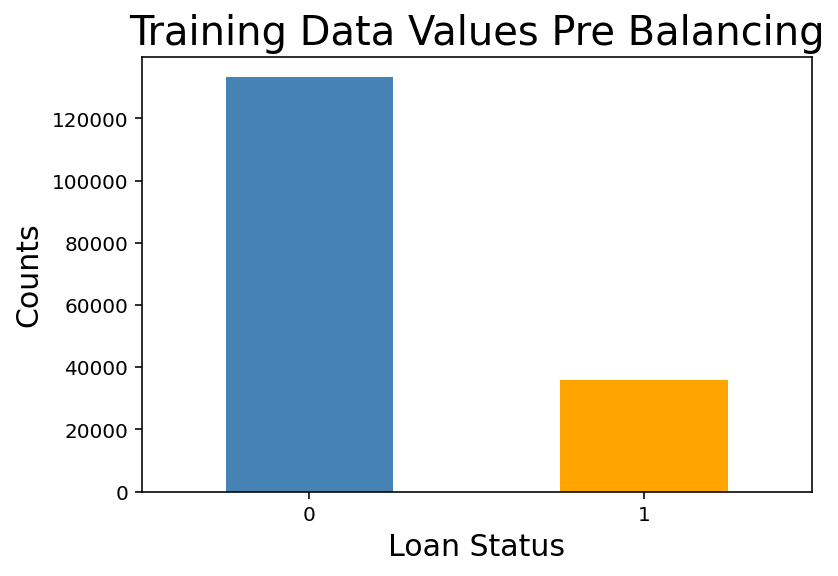

In [35]:
y_train_fully_paid = pd.Series(y_train).value_counts().sort_values(ascending = False)[0]
y_train_charged_off = pd.Series(y_train).value_counts().sort_values(ascending = False)[1]

# checking the new counts
print("Number transactions before balancing X_train dataset: ", X_train_sc.shape)
print(f'Fully Paid: {y_train_fully_paid}')
print(f'Defaulted: {y_train_charged_off}')

# observe that data has been balanced in training data
pd.Series(y_train).value_counts().sort_values(ascending = False).plot.bar(color = ['steelblue', 'orange'])
plt.title('Training Data Values Pre Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15, rotation = 0)
plt.xticks(rotation = 0);

Number transactions after balancing X_train dataset:  (266394, 14)


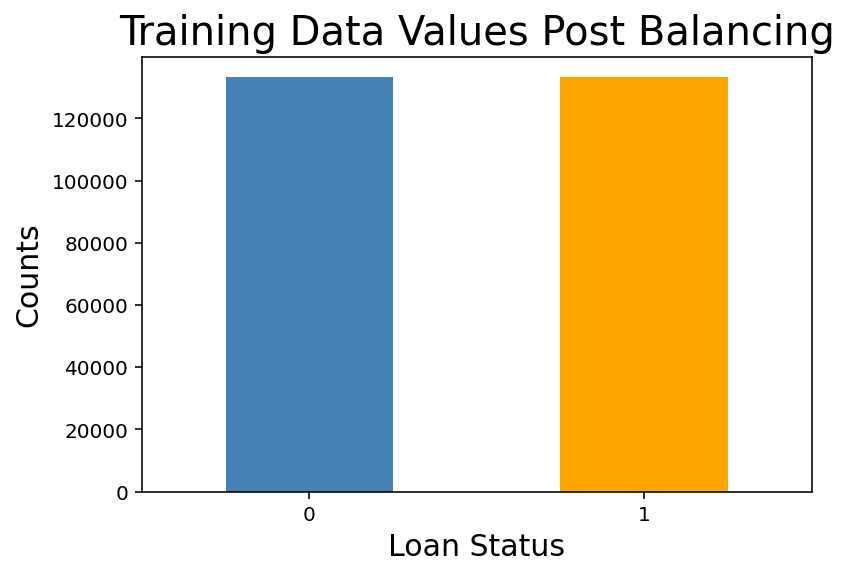

In [36]:
# instantiating SMOTE
sm = SMOTE(random_state = 42)
# fitting the scaled train data
X_train_new, y_train_new = sm.fit_resample(X_train_sc, y_train.ravel())

# checking the new counts
print("Number transactions after balancing X_train dataset: ", X_train_new.shape)

# observe that data has been balanced in training data
pd.Series(y_train_new).value_counts().sort_values(ascending = False).plot.bar(color = ['steelblue', 'orange'])
plt.title('Training Data Values Post Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15)
plt.xticks(rotation = 0);

In [37]:
pd.Series(y_train_new).value_counts()

0    133197
1    133197
dtype: int64

In [38]:
X_train_new.shape

(266394, 14)

In [39]:
X_test_sc.shape

(56403, 14)

In [40]:
y_train_new.shape

(266394,)

In [41]:
y_test.shape

(56403,)

## Model Building With Smote and Feature Selection Preparation

In [42]:
from sklearn import metrics
from sklearn.metrics import roc_curve


def plot_ROC(model, labels):
    '''Plot ROC and save the pic'''
    Y_test_pred = model.predict_proba(X_test_sc)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, Y_test_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=labels)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve - {} model'.format(labels))
    plt.legend(loc='best')
    plt.savefig(labels+'_ROC.png', dpi=150)
    plt.show()
    print("AUC score is", metrics.auc(fpr, tpr))
    return

In [43]:
def plot_feature_importance(model, labels):
    '''Plot the feature importance plot and save the file'''
    # feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    temp = pd.DataFrame(importances[indices], X.columns[indices])
    temp.columns = ["Feature importance"]
    temp["Feature name"] = temp.index
    plt.subplots(figsize=(10, 8))
    ax = sns.barplot(
        y="Feature name",
        x="Feature importance",
        data=temp.iloc[:20, ]
    )
    plt.title("Feature Importance_"+labels)
    plt.savefig(labels+'_FI.png', dpi=150)
    return

In [44]:
def training_score(model):
    print("Training accuracy is {:.4f}".format(model.score(X_train_new, y_train_new)))


def testing_score(model):
    print("Testing accuracy is {:.4f}".format(model.score(X_test_sc, y_test)))

### Logistic Regression

In [25]:
# Instantiate model for logistic regression, including max iterations
lr = LogisticRegression(random_state = 42, max_iter = 500)

# Fit model
lr.fit(X_train_new, y_train_new)

# checking accuracy scores
print(f'Logistic Regression Train Accuracy: {lr.score(X_train_new, y_train_new)}')
print(f'Logistic Regression Test Accuracy: {lr.score(X_test_sc, y_test)}')

# predicting values for linear regression
y_hat_lr_train = lr.predict(X_train_new)
y_hat_lr_test = lr.predict(X_test_sc)

# checking recall scores
lr_recall_train = recall_score(y_train_new, y_hat_lr_train)
lr_recall_test = recall_score(y_test, y_hat_lr_test)

print(f'Logistic Regression Train Recall: {lr_recall_train}')
print(f'Logistic Regression Test Recall: {lr_recall_test}')

Logistic Regression Train Accuracy: 0.6457430525185862
Logistic Regression Test Accuracy: 0.6528682804198123
Logistic Regression Train Recall: 0.6308028200744775
Logistic Regression Test Recall: 0.62943848059455


### RF

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
classifier_RF = RandomForestClassifier()

# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [50] #commented out [500,1000]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=3)
Grid_RF.fit(X_train_new, y_train_new)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50]})

In [28]:
best_RF_model = Grid_RF.best_estimator_

In [29]:
testing_score(best_RF_model)

Testing accuracy is 0.7514


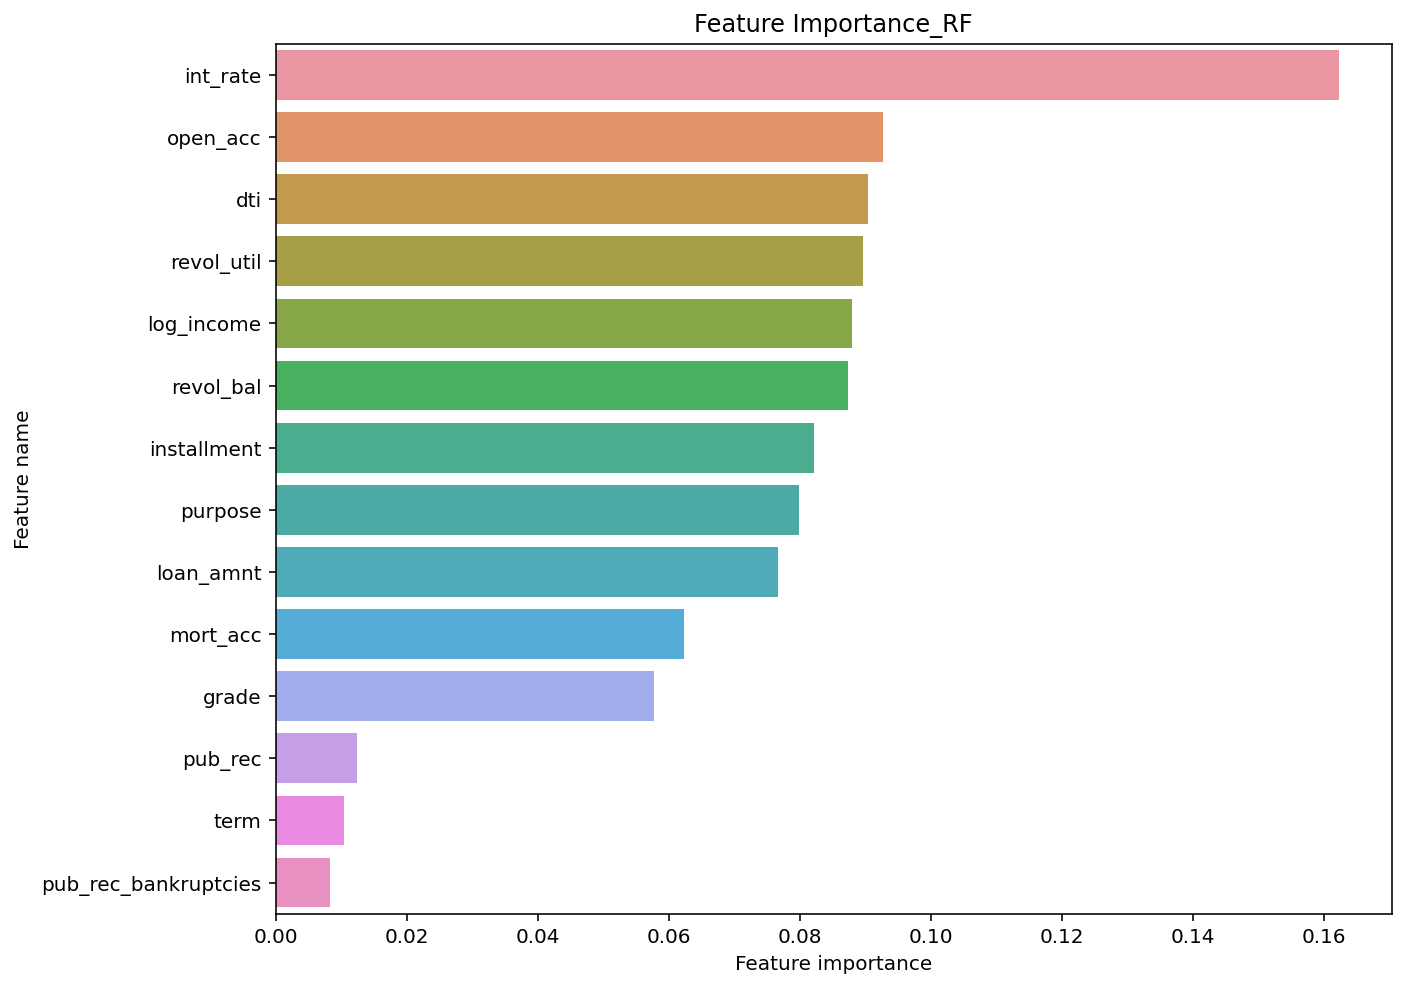

In [30]:
plot_feature_importance(best_RF_model, "RF")

In [31]:
training_score(best_RF_model)

Training accuracy is 1.0000


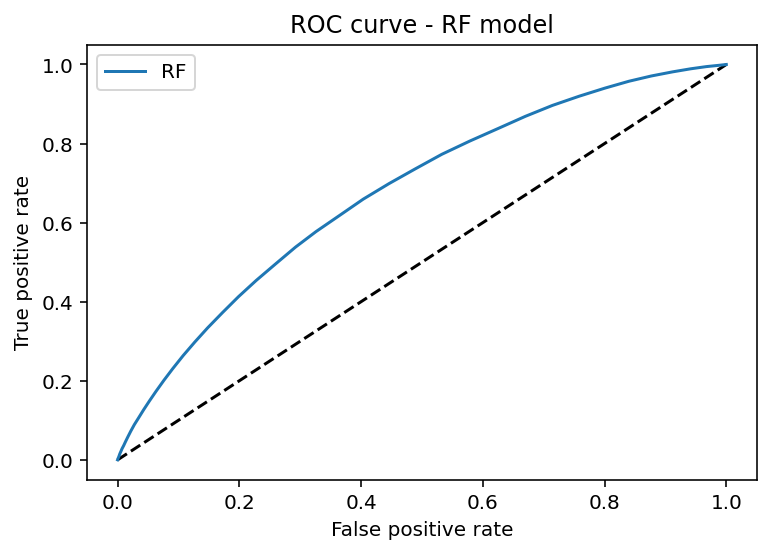

AUC score is 0.6764856173604606


In [32]:
plot_ROC(best_RF_model, "RF")

### XGBoost

In [42]:
from xgboost import XGBClassifier

# XGBoost
classifier_xgb = XGBClassifier(tree_method= 'gpu_hist')

# Randomly search the hyperparameter space
parameters = {
    'min_child_weight':(0,0.1,1,10,100,500),
    'learning_rate':(0.01, 0.1,1),
    'min_split_loss':(0,0.01,0.1,1),
    'max_depth':(2,6,8,10,12),
    'lambda':(0.1,1,2,5,10)
}
Random_XGB = RandomizedSearchCV(classifier_xgb,parameters, cv=3)
Random_XGB.fit(X_train_new, y_train_new)

[22:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...one,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                

In [43]:
Random_XGB.best_params_

{'min_split_loss': 0.1,
 'min_child_weight': 10,
 'max_depth': 12,
 'learning_rate': 0.1,
 'lambda': 0.1}

In [45]:
parameters = {
    'min_child_weight':(300,500,800),
    'learning_rate':(0.05,0.1,0.3),
    'min_split_loss':(0,0.01,0.1),
    'max_depth':(2,6,8,10,12),
    'lambda':(0.1,0.5,1)
}


Grid_XGB = GridSearchCV(XGBClassifier(tree_method= 'gpu_hist'),parameters, cv=3)
Grid_XGB.fit(X_train_new, y_train_new)

[22:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:38:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_

In [46]:
Grid_XGB.best_params_

{'lambda': 0.1,
 'learning_rate': 0.3,
 'max_depth': 10,
 'min_child_weight': 300,
 'min_split_loss': 0.01}

In [47]:
best_Grid_XGB = Grid_XGB.best_estimator_

In [48]:
training_score(best_Grid_XGB)

Training accuracy is 0.8421


In [49]:
testing_score(best_Grid_XGB)

Testing accuracy is 0.7645


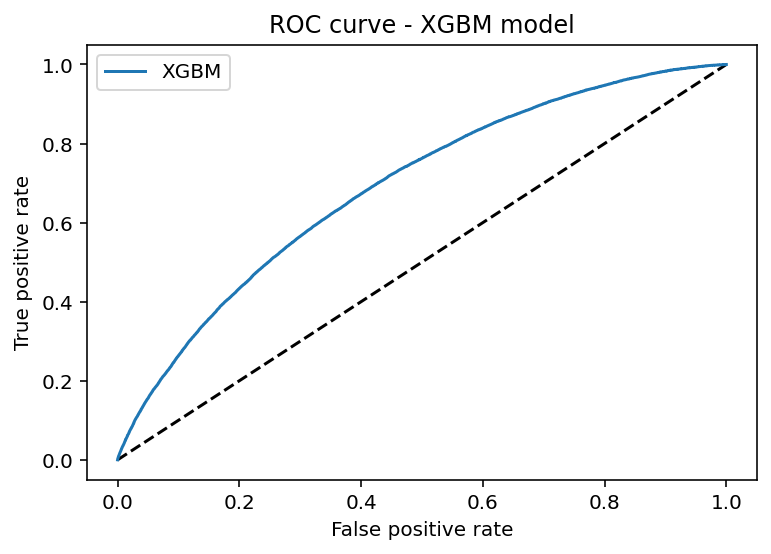

AUC score is 0.690157665638729


In [50]:
plot_ROC(best_Grid_XGB, "XGBM")

### LightBoost

In [51]:
import lightgbm as lgb
import random

from sklearn.metrics import confusion_matrix
random.seed(2020)
# Use grid search and 5 fold cross validation to find the best model
parameters = {
    "n_estimators": (50, 100, 200),
    "max_depth" : (5,),
    "reg_lambda" : (0.1,0.01)
}
model_lgb =lgb.LGBMClassifier(device='gpu',eval_metric = "auc", )
Grid_lgbm = GridSearchCV(model_lgb,parameters, cv=3,  scoring = "roc_auc")

In [52]:
Grid_lgbm.fit(X_train_new, y_train_new)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric


GridSearchCV(cv=3, estimator=LGBMClassifier(device='gpu', eval_metric='auc'),
             param_grid={'max_depth': (5,), 'n_estimators': (50, 100, 200),
                         'reg_lambda': (0.1, 0.01)},
             scoring='roc_auc')

In [53]:
best_lgbm = Grid_lgbm.best_estimator_
best_lgbm

LGBMClassifier(device='gpu', eval_metric='auc', max_depth=5, n_estimators=200,
               reg_lambda=0.1)

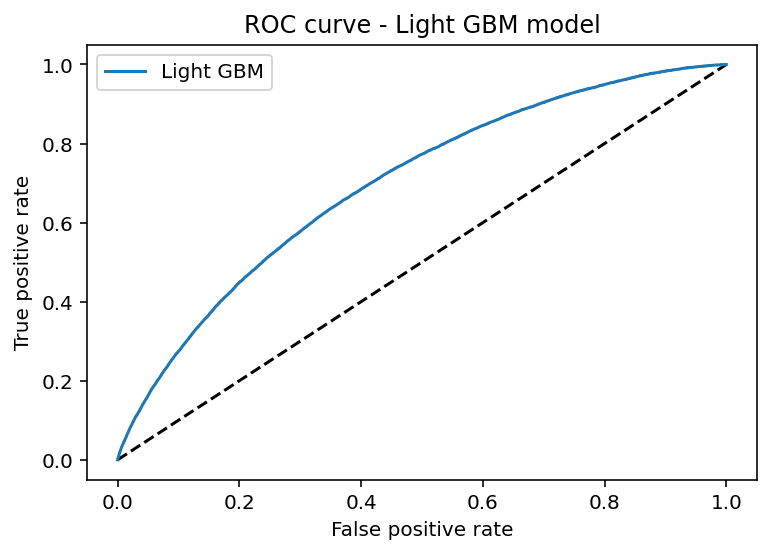

AUC score is 0.6975262850534646


In [54]:
plot_ROC(best_lgbm, "Light GBM")

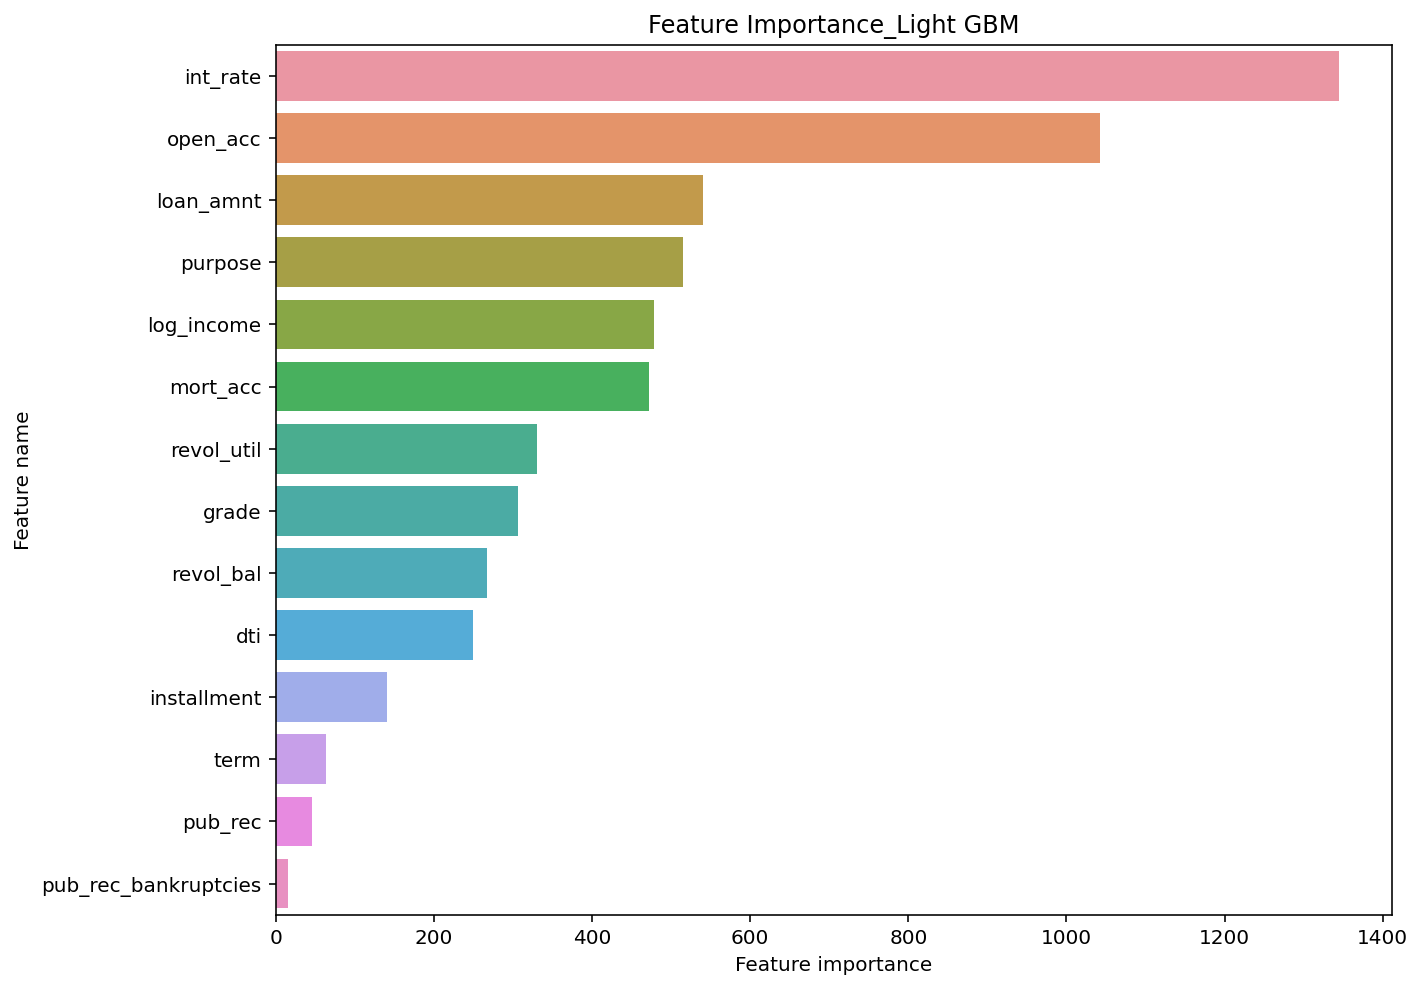

In [55]:
plot_feature_importance(best_lgbm, "Light GBM")

In [56]:
training_score(best_lgbm)

Training accuracy is 0.8340


In [57]:
testing_score(best_lgbm)

Testing accuracy is 0.7675


### GradientBoosting

In [60]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

parameters = {
    "learning_rate": [0.01, 0.1],
    "n_estimators":[10]
    }

GRID_GB = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)

In [61]:
GRID_GB.fit(X_train_new, y_train_new)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'n_estimators': [10]})

In [62]:
best_gb = GRID_GB.best_estimator_
best_gb

GradientBoostingClassifier(n_estimators=10)

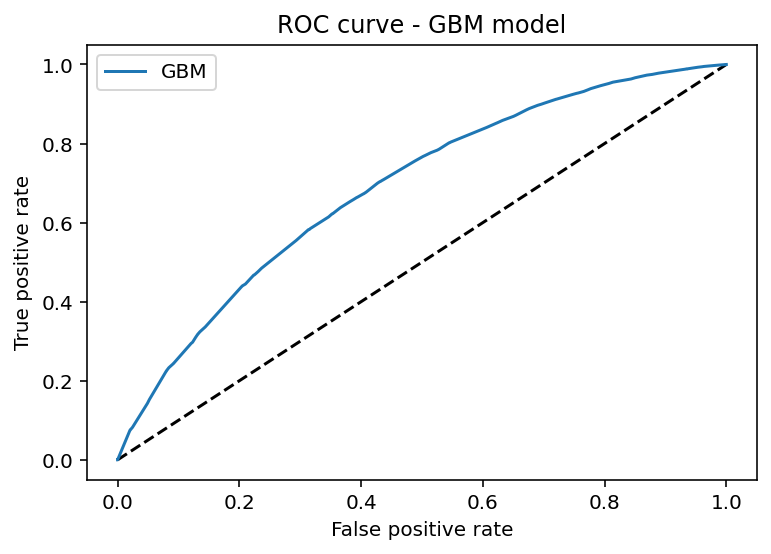

AUC score is 0.6884546896598993


In [63]:
plot_ROC(best_gb, "GBM")

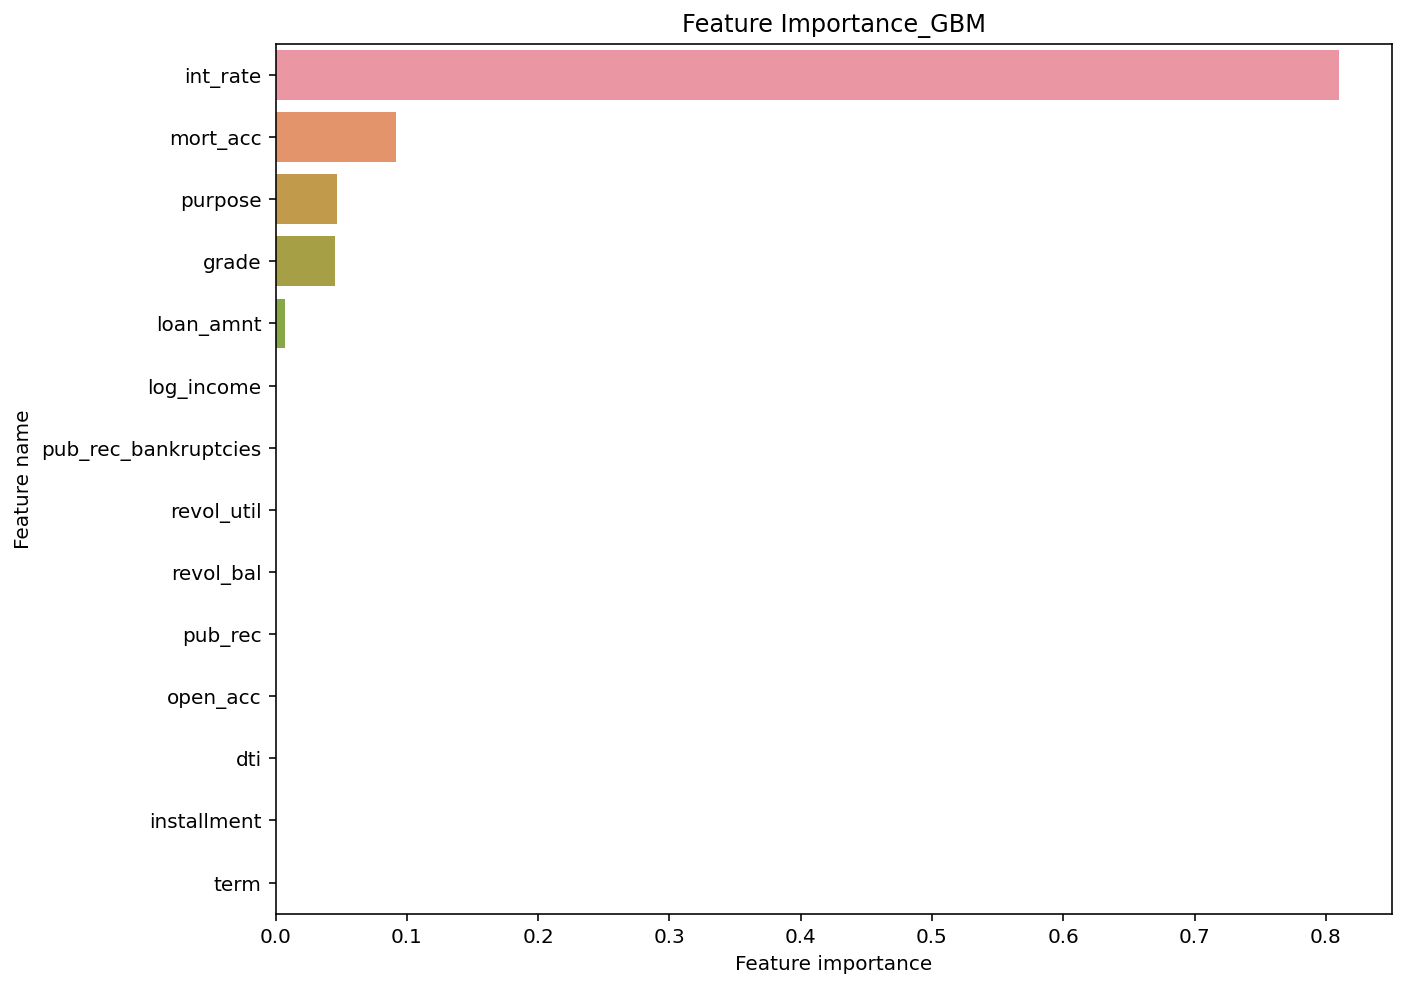

In [64]:
plot_feature_importance(best_gb, "GBM")

In [65]:
training_score(best_gb)

Training accuracy is 0.6674


In [66]:
testing_score(best_lgbm)

Testing accuracy is 0.7675


### AdaBoost

In [67]:
# creating a function to run models and print Train and Test accuracy and recall scores for all other models
def run_model(model_name):
    # instantiating the model
    model = model_name(random_state = 42)
    # Fit model
    model.fit(X_train_new, y_train_new)
    
    # checking accuracy scores
    print(f'{model_name} Train Accuracy: {model.score(X_train_new, y_train_new)}')
    print(f'{model_name} Test Accuracy: {model.score(X_test_sc, y_test)}')

    # predicting values for linear regression
    y_hat_train = model.predict(X_train_new)
    y_hat_test = model.predict(X_test_sc)

    # checking recall scores
    recall_train = recall_score(y_train_new, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)

    print(f'{model_name} Train Recall: {recall_train}')
    print(f'{model_name} Test Recall: {recall_test}')

In [68]:
run_model(AdaBoostClassifier)

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Train Accuracy: 0.6996779708185902
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Test Accuracy: 0.6626464214934028
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Train Recall: 0.7140599530871069
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Test Recall: 0.5915221579961464


## Feature Selection and Model Building

Due to term, pub_rec and pub_rec_bankruptcies having such low feature importance scores, these columns will be dropped and a new set of training and test sets will be formed to run the models again.

### Cleaning

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225611 entries, 0 to 225610
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             225611 non-null  float64
 1   term                  225611 non-null  int64  
 2   int_rate              225611 non-null  float64
 3   installment           225611 non-null  float64
 4   grade                 225611 non-null  int64  
 5   loan_status           225611 non-null  int64  
 6   purpose               225611 non-null  int64  
 7   dti                   225611 non-null  float64
 8   open_acc              225611 non-null  float64
 9   pub_rec               225611 non-null  float64
 10  revol_bal             225611 non-null  float64
 11  revol_util            225611 non-null  float64
 12  mort_acc              225611 non-null  float64
 13  pub_rec_bankruptcies  225611 non-null  float64
 14  log_income            225611 non-null  float64
 15  

In [46]:
df = df.drop(columns=['term', 'pub_rec', 'pub_rec_bankruptcies'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225611 entries, 0 to 225610
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_amnt    225611 non-null  float64
 1   int_rate     225611 non-null  float64
 2   installment  225611 non-null  float64
 3   grade        225611 non-null  int64  
 4   loan_status  225611 non-null  int64  
 5   purpose      225611 non-null  int64  
 6   dti          225611 non-null  float64
 7   open_acc     225611 non-null  float64
 8   revol_bal    225611 non-null  float64
 9   revol_util   225611 non-null  float64
 10  mort_acc     225611 non-null  float64
 11  log_income   225611 non-null  float64
 12  issue_d      225611 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 22.4+ MB


In [48]:
df.loan_status.value_counts().sum()

225611

In [49]:
# create X and y
X = df.drop(columns = ['loan_status', 'issue_d'])
y = df['loan_status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# Scaling data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

Number transactions after balancing X_train dataset:  (266394, 11)


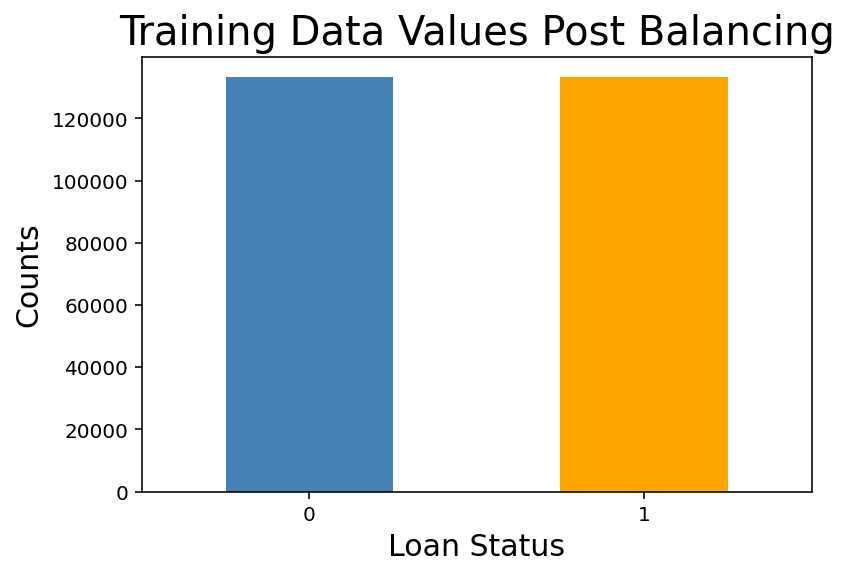

In [50]:
# instantiating SMOTE
sm = SMOTE(random_state = 42)
# fitting the scaled train data
X_train_new, y_train_new = sm.fit_resample(X_train_sc, y_train.ravel())

# checking the new counts
print("Number transactions after balancing X_train dataset: ", X_train_new.shape)

# observe that data has been balanced in training data
pd.Series(y_train_new).value_counts().sort_values(ascending = False).plot.bar(color = ['steelblue', 'orange'])
plt.title('Training Data Values Post Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15)
plt.xticks(rotation = 0);

In [51]:
pd.Series(y_train_new).value_counts()

0    133197
1    133197
dtype: int64

In [52]:
X_train_new.shape

(266394, 11)

In [53]:
X_test_sc.shape

(56403, 11)

In [54]:
y_train_new.shape

(266394,)

In [55]:
y_test.shape

(56403,)

### LR

In [56]:
# Instantiate model for logistic regression, including max iterations
lr = LogisticRegression(random_state = 42, max_iter = 500)

# Fit model
lr.fit(X_train_new, y_train_new)

# checking accuracy scores
print(f'Logistic Regression Train Accuracy: {lr.score(X_train_new, y_train_new)}')
print(f'Logistic Regression Test Accuracy: {lr.score(X_test_sc, y_test)}')

# predicting values for linear regression
y_hat_lr_train = lr.predict(X_train_new)
y_hat_lr_test = lr.predict(X_test_sc)

# checking recall scores
lr_recall_train = recall_score(y_train_new, y_hat_lr_train)
lr_recall_test = recall_score(y_test, y_hat_lr_test)

print(f'Logistic Regression Train Recall: {lr_recall_train}')
print(f'Logistic Regression Test Recall: {lr_recall_test}')

Logistic Regression Train Accuracy: 0.6457277566311553
Logistic Regression Test Accuracy: 0.6467031895466553
Logistic Regression Train Recall: 0.6465911394400775
Logistic Regression Test Recall: 0.6439520159946684


### RF

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
classifier_RF = RandomForestClassifier()

# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [100, 200] #commented out [500,1000]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=3)
Grid_RF.fit(X_train_new, y_train_new)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200]})

In [58]:
best_RF_model = Grid_RF.best_estimator_

In [59]:
testing_score(best_RF_model)

Testing accuracy is 0.7642


In [60]:
training_score(best_RF_model)

Training accuracy is 1.0000


### XGBoost

In [61]:
from xgboost import XGBClassifier

# XGBoost
classifier_xgb = XGBClassifier(tree_method= 'gpu_hist')

# Randomly search the hyperparameter space
parameters = {
    'min_child_weight':(300,400),
    'learning_rate':(0.01,0.1,0.3),
    'min_split_loss':(0,0.01,0.1),
    'max_depth':(8,10,12),
    'lambda':(0.1,0.5,1),
    'n_estimators':(200,400)
}


Grid_XGB = GridSearchCV(XGBClassifier(tree_method= 'gpu_hist'),parameters, cv=3)
Grid_XGB.fit(X_train_new, y_train_new)

[14:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:30:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:42:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_

In [62]:
Grid_XGB.best_params_

{'lambda': 1,
 'learning_rate': 0.3,
 'max_depth': 12,
 'min_child_weight': 300,
 'min_split_loss': 0,
 'n_estimators': 400}

In [63]:
best_Grid_XGB = Grid_XGB.best_estimator_

In [64]:
training_score(best_Grid_XGB)

Training accuracy is 0.8515


In [65]:
testing_score(best_Grid_XGB)

Testing accuracy is 0.7645


### LightBoost

In [66]:
import lightgbm as lgb
import random

from sklearn.metrics import confusion_matrix
random.seed(2020)
# Use grid search and 5 fold cross validation to find the best model
parameters = {
    "n_estimators": (50, 100, 200),
    "max_depth" : (5,10),
    "reg_lambda" : (0.1,0.01)
}
model_lgb =lgb.LGBMClassifier(device='gpu',eval_metric = "auc", )
Grid_lgbm = GridSearchCV(model_lgb,parameters, cv=3,  scoring = "roc_auc")

In [67]:
Grid_lgbm.fit(X_train_new, y_train_new)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [

GridSearchCV(cv=3, estimator=LGBMClassifier(device='gpu', eval_metric='auc'),
             param_grid={'max_depth': (5, 10), 'n_estimators': (50, 100, 200),
                         'reg_lambda': (0.1, 0.01)},
             scoring='roc_auc')

In [68]:
best_lgbm = Grid_lgbm.best_estimator_
best_lgbm

LGBMClassifier(device='gpu', eval_metric='auc', max_depth=5, n_estimators=200,
               reg_lambda=0.1)

In [69]:
training_score(best_lgbm)

Training accuracy is 0.8449


In [70]:
testing_score(best_lgbm)

Testing accuracy is 0.7749


### GradientBoost

In [71]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

parameters = {
    "learning_rate": [0.01, 0.1],
    "n_estimators":[32,64,100],
    "max_depth":[2,4]
    }

GRID_GB = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)

In [72]:
GRID_GB.fit(X_train_new, y_train_new)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 4],
                         'n_estimators': [32, 64, 100]})

In [73]:
best_gb = GRID_GB.best_estimator_
best_gb

GradientBoostingClassifier(max_depth=4)

In [74]:
training_score(best_gb)

Training accuracy is 0.8094


In [75]:
testing_score(best_lgbm)

Testing accuracy is 0.7749


## Model Evaluations for Final Model Selection - then more parameter tuning

In [89]:
import itertools
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report


def confusion_plot(model, labels):
    """Plot the confusion plot of the test set"""
    Y_test_pred = model.predict(X_test_sc)
    cm = confusion_matrix(y_test, Y_test_pred)
    model_eval = precision_recall_fscore_support(y_test, Y_test_pred)
    print("The precision is", model_eval[0])
    print("The recall is", model_eval[1])
    print("The F1 score is", model_eval[2])
    cmap = plt.cm.Reds

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(['No', 'Yes']))
    plt.xticks(tick_marks, ['No', 'Yes'], rotation=45)
    plt.yticks(tick_marks, ['No', 'Yes'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )
    ax = plt.axes()
    t = 'Confusion Matrix:'
    ax.set_title(t, fontweight="bold", size=10)
    plt.savefig(labels+'_cm.png', dpi=150)
    plt.show()

### RF

In [90]:
# Make predictions on the testing set
Y_pred_rf = best_RF_model.predict(X_test_sc)
testing_score(best_RF_model)

Testing accuracy is 0.7642


In [91]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     44399
           1       0.41      0.24      0.30     12004

    accuracy                           0.76     56403
   macro avg       0.61      0.57      0.58     56403
weighted avg       0.73      0.76      0.74     56403



The precision is [0.81489732 0.40768683]
The recall is [0.90628167 0.23858714]
The F1 score is [0.85816352 0.30101424]


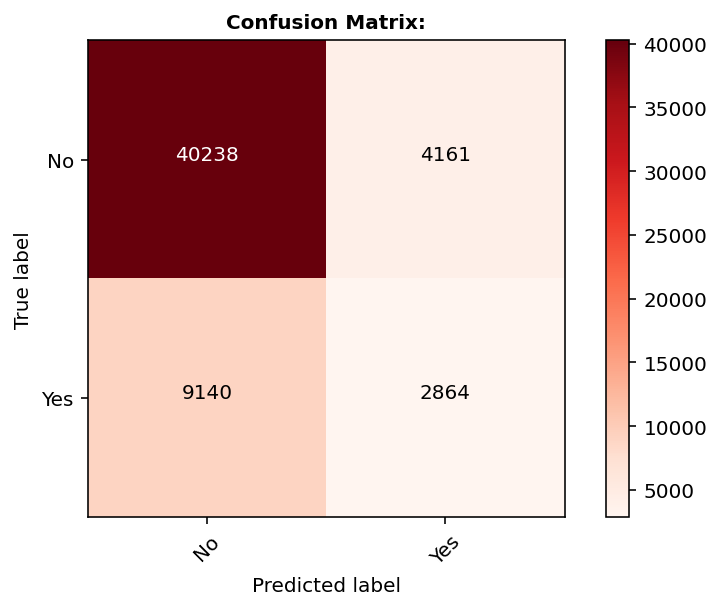

In [92]:
confusion_plot(best_RF_model,"cm_RF")

### XGBoost

In [93]:
# Make predictions on the testing set
Y_pred_xgb = best_Grid_XGB.predict(X_test_sc)
testing_score(best_Grid_XGB)

Testing accuracy is 0.7645


In [94]:
print(classification_report(y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     44399
           1       0.40      0.23      0.29     12004

    accuracy                           0.76     56403
   macro avg       0.61      0.57      0.57     56403
weighted avg       0.73      0.76      0.74     56403



The precision is [0.81314656 0.40494268]
The recall is [0.90997545 0.22659114]
The F1 score is [0.85884041 0.29058277]


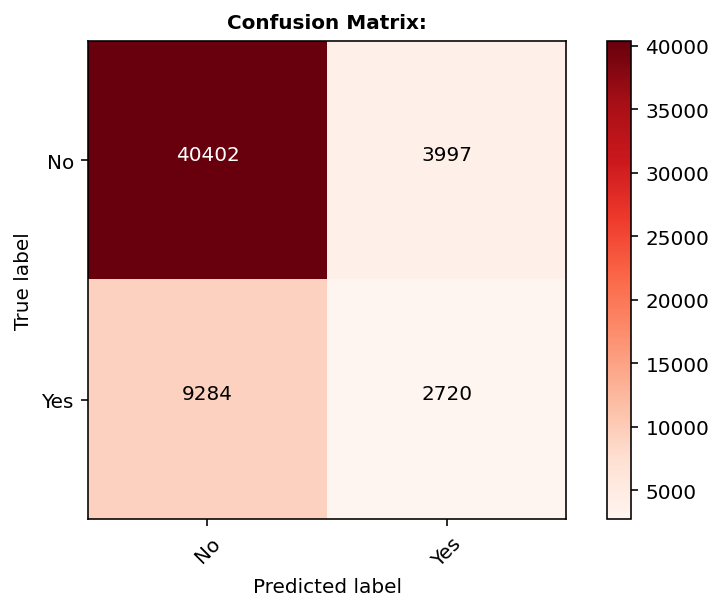

In [95]:
confusion_plot(best_Grid_XGB,"cm_XGB")

### LightBoost

In [96]:
# Make predictions on the testing set
Y_pred_lgb = best_lgbm.predict(X_test_sc)
testing_score(best_lgbm)

Testing accuracy is 0.7749


In [97]:
print(classification_report(y_test, Y_pred_lgb))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     44399
           1       0.44      0.21      0.28     12004

    accuracy                           0.77     56403
   macro avg       0.63      0.57      0.58     56403
weighted avg       0.73      0.77      0.74     56403



The precision is [0.81277503 0.43939923]
The recall is [0.92770107 0.2095968 ]
The F1 score is [0.86644369 0.28381275]


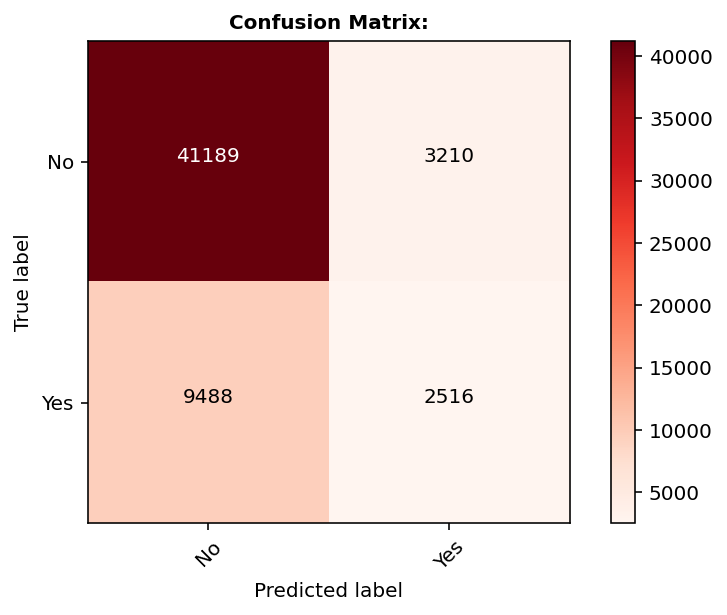

In [98]:
confusion_plot(best_lgbm,"cm_LGB")

### GradientBoost

In [99]:
# Make predictions on the testing set
Y_pred_gb = best_gb.predict(X_test_sc)
testing_score(best_gb)

Testing accuracy is 0.7446


In [100]:
print(classification_report(y_test, Y_pred_gb))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     44399
           1       0.39      0.35      0.37     12004

    accuracy                           0.74     56403
   macro avg       0.61      0.60      0.60     56403
weighted avg       0.74      0.74      0.74     56403



The precision is [0.82895372 0.38897623]
The recall is [0.85119034 0.35038321]
The F1 score is [0.83992488 0.36867248]


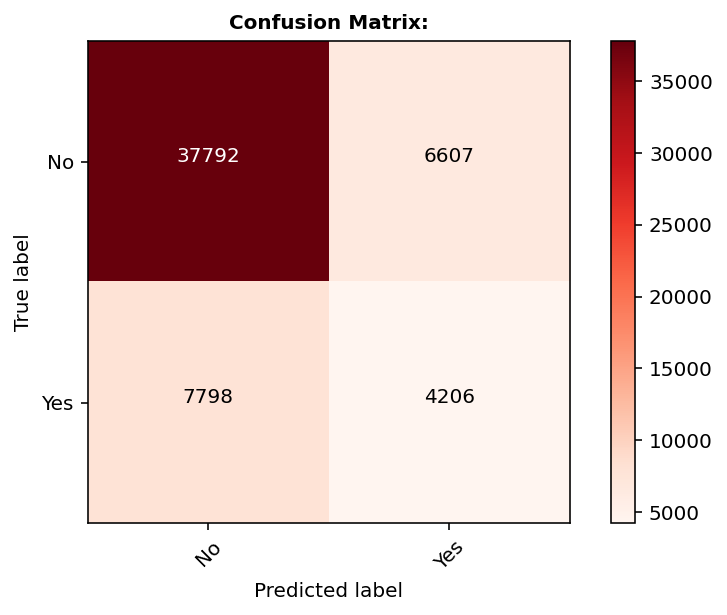

In [101]:
confusion_plot(best_gb,"cm_GB")

## Final Model Selection and Tuning

In [102]:
import lightgbm as lgb
import random
from sklearn.metrics import confusion_matrix
random.seed(2020)
# Use grid search and 5 fold cross validation to find the best model
parameters = {
    "learning_rate": (0.01, 0.05, 0.1),
    "boosting_type" : ['gbdt'],
    "n_estimators": (300,350),
    "max_depth" : (12,14),
    "reg_lambda" : (0.05, 0.01),
    "num_leaves": [14,16],
    "reg_alpha" : [1,1.2]
}
model_lgb = lgb.LGBMClassifier(device='gpu', eval_metric = "auc", )
Grid_lgbm = GridSearchCV(model_lgb, parameters, cv=5,  scoring = "roc_auc")

In [103]:
Grid_lgbm.fit(X_train_new, y_train_new)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric


GridSearchCV(cv=5, estimator=LGBMClassifier(device='gpu', eval_metric='auc'),
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': (0.01, 0.05, 0.1),
                         'max_depth': (12, 14), 'n_estimators': (300, 350),
                         'num_leaves': [14, 16], 'reg_alpha': [1, 1.2],
                         'reg_lambda': (0.05, 0.01)},
             scoring='roc_auc')

In [104]:
best_lgbm = Grid_lgbm.best_estimator_
best_lgbm

LGBMClassifier(device='gpu', eval_metric='auc', max_depth=12, n_estimators=350,
               num_leaves=16, reg_alpha=1.2, reg_lambda=0.01)

In [105]:
training_score(best_lgbm)

Training accuracy is 0.8514


In [106]:
testing_score(best_lgbm)

Testing accuracy is 0.7792


In [107]:
# Make predictions on the testing set
Y_pred_lgb = best_lgbm.predict(X_test_sc)
testing_score(best_lgbm)

Testing accuracy is 0.7792


In [108]:
print(classification_report(y_test, Y_pred_lgb))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     44399
           1       0.45      0.17      0.24     12004

    accuracy                           0.78     56403
   macro avg       0.63      0.56      0.56     56403
weighted avg       0.73      0.78      0.74     56403



The precision is [0.80737776 0.44950406]
The recall is [0.94499876 0.1661113 ]
The F1 score is [0.8707843  0.24257908]


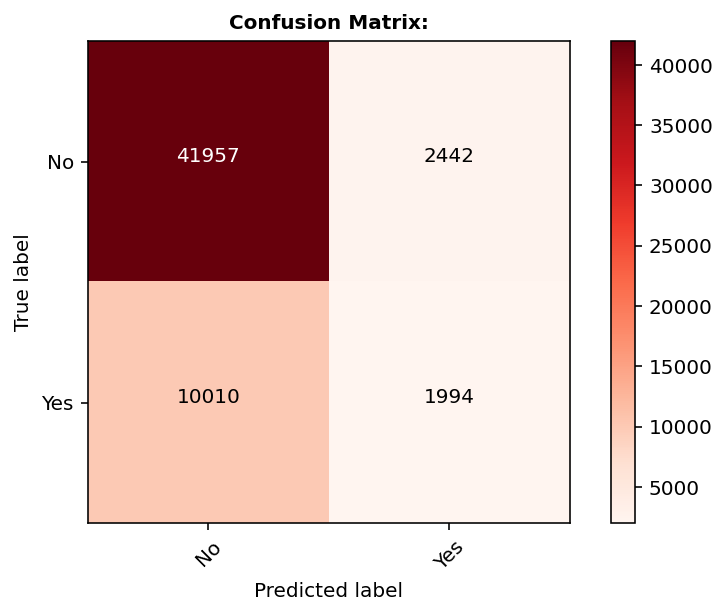

In [109]:
confusion_plot(best_lgbm,"cm_LGB")